In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.insert(0, f"{os.getenv('HOME')}/code/experiment-results-manager")

In [2]:

from IPython.display import display, HTML
import experiment_results_manager as erm
import seaborn as sns

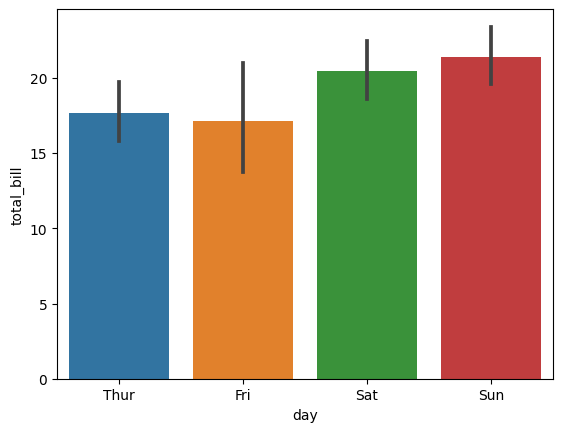

In [3]:
# creating arbitrary plots in seaborn and plotly
tips = sns.load_dataset('tips')
mpl_fig = sns.barplot(x='day', y='total_bill', data=tips)


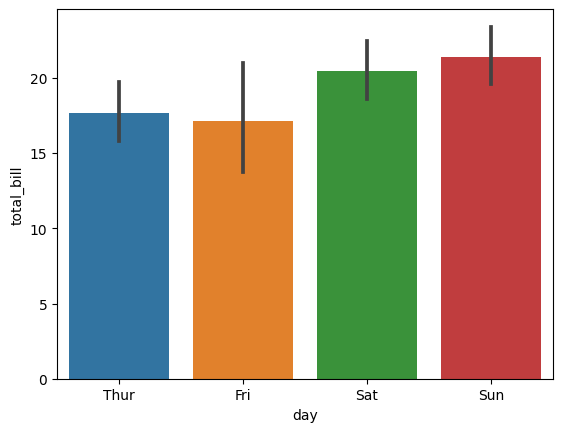

In [4]:
# Log some metrics to an experiment and display a report
er = erm.ExperimentRun(experiment_id="regression", variant_id="main")
er.log_param("model", "lightgbm")
er.log_param("num_trees", 10)
er.log_metric("rmse", 0.8)
er.log_metric("mae", 0.9)
er.log_figure(mpl_fig, "sns_fig")

html = erm.display_runs(er)
display(HTML(html))

In [5]:
# save it anywhere using fsspec. Use fsspec.available_protocols() to see all possibilities
saved_path = erm.save_experiment_run_to_registry(er, "file:///tmp/erm")

experiment run saved to file:///tmp/erm/regression/main/2023_04_17__16_18_05



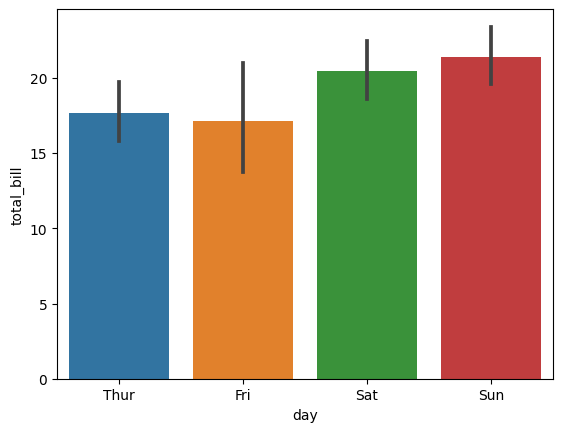
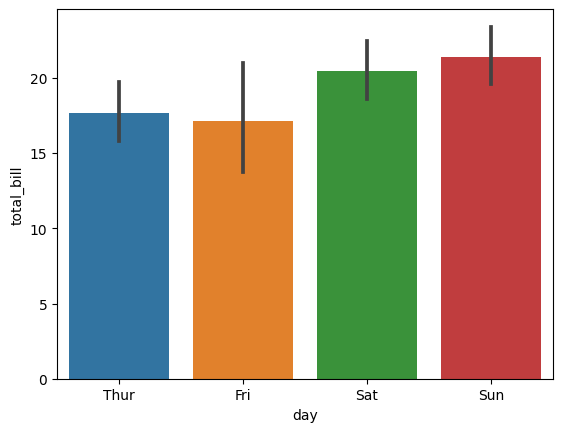

In [6]:
# load the previous run and verify that it is the same as the previous one
er2 = erm.load_experiment_run_from_path(saved_path)
html = erm.display_runs(er, er2)
display(HTML(html))